# ニューラルネットワークの仕組み
このNotebookで、算数だけで単純なニューラルネットワーク（パーセプトロンという）を構築し、「AND」と「OR」の論理演算を学習させてみよう

まず、必要なパッケージ（機能）を挿入しよう

In [1]:
# numpyはベクトル、または行列を処理しやすいパッケージである。
import numpy as np 

## numpyの操作
まず、numpy配列の操作を少し把握しないといけない。numpyでは、「行」と「列」を別々で処理できる。例えば、この行列

\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}

numpyで以下のようになる：

In [2]:
test_matrix = np.array([[1, 2, 3], [4, 5, 6]])

# 2行、3列であることを確認！
print(test_matrix.shape)

(2, 3)


In [3]:
#中身も確認
print(test_matrix)

[[1 2 3]
 [4 5 6]]


In [4]:
#また、1個の要素だけを見たい場合、0から始まる指数でアクセスできる：
print(test_matrix[1, 0])

4


In [5]:
# 1行目を確認
print(test_matrix[0,:])

[1 2 3]


In [6]:
# 2列目を確認
print(test_matrix[:,1])

[2 5]


In [7]:
# もちろん、行か列単位で計算もOK
print(test_matrix[0,:] + test_matrix[1,:])

[5 7 9]


In [8]:
# また、数値・演算・numpy も可能
# 例えば、足し算
print (1 + test_matrix)

[[2 3 4]
 [5 6 7]]


In [9]:
# 乗算
print (2 * test_matrix[0,:])

[2 4 6]


## ネットワークの構築
入力２つ、出力１つをもっているニューラルネットワークを構築しよう。

一般的に、ニューラルネットワークを用いたAIは「モデル」という。

In [10]:
def create_model():    
    model = {
        # 荷重を -5 ~ 5 の乱数で初期化
        "weights" : np.random.uniform(-5, 5, 2),    
        # バイアスも！
        "bias"    : np.random.uniform(-5, 5, 1)}

    return model

モデルを１つ作って、中身を確認

In [11]:
model = create_model()
print(model)

{'weights': array([-0.96271622, -0.95406796]), 'bias': array([-1.39559866])}


## 推論
パーセプトロンの推論は:
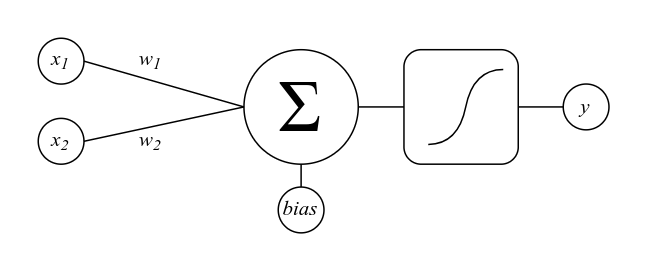
$$ 
sum = x_1 w_1 + x_2 w_2 + bias \\
y = 活性化(sum)
$$

In [12]:
def predict(model, activation, x):
    
    # 足し算を計算し…
    y = model["weights"][0] * x[0] + model["weights"][1] * x[1] + model["bias"]
    
    # 活性化で処理し、その結果を返す
    y = activation(y)
    return y

とりあえず、活性化関数はあまり気にせずに、何もしない「線形関数」でいきましょう

In [13]:
def linear_activation(x):
    return x

入力データを用意し、推論してみましょう！

In [14]:
x_list = np.array([
    [0, 0], 
    [0, 1], 
    [1, 0], 
    [1, 1]
], dtype = float)

print(x_list.shape)

(4, 2)


In [15]:
# 推論
for x in x_list:
    y = predict(model, linear_activation, x)
    print(x, "->", y)

[0. 0.] -> [-1.39559866]
[0. 1.] -> [-2.34966662]
[1. 0.] -> [-2.35831488]
[1. 1.] -> [-3.31238284]


ステップ関数の活性化も確認してみよう

In [16]:
def step_activation(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [17]:
# 推論
for x in x_list:
    y = predict(model, step_activation, x)
    print(x, "->", y)

[0. 0.] -> 0
[0. 1.] -> 0
[1. 0.] -> 0
[1. 1.] -> 0


もう一度モデルを作るとどうなる？

In [18]:
# モデル作成
model = create_model()

# 推論
for x in x_list:
    y = predict(model, step_activation, x)
    print(x, "->", y)

[0. 0.] -> 1
[0. 1.] -> 1
[1. 0.] -> 1
[1. 1.] -> 1


当然、まだ学習されていないため、毎度はランダムに推論する。